In [ ]:
!pip install pyrdf2vec

In [ ]:
pip install rdflib

In [ ]:
import pandas as pd

from pyrdf2vec import RDF2VecTransformer
from pyrdf2vec.embedders import Word2Vec
from pyrdf2vec.graphs import KG
from pyrdf2vec.walkers import RandomWalker

A very simple approach to convert Knowledge Graph to Vector Space https://github.com/IBCNServices/pyRDF2Vec

In [ ]:
# Read a CSV file containing the entities we want to classify.
data = pd.read_csv("entities.tsv", sep="\t")
entities = [entity for entity in data["location"]]
print(entities)
# [
#    "http://dbpedia.org/resource/Belgium",
#    "http://dbpedia.org/resource/France",
#    "http://dbpedia.org/resource/Germany",
# ]

# Define our knowledge graph (here: DBPedia SPARQL endpoint).
knowledge_graph = KG(
    "https://dbpedia.org/sparql",
    skip_predicates={"www.w3.org/1999/02/22-rdf-syntax-ns#type"},
    literals=[
        [
            "http://dbpedia.org/ontology/wikiPageWikiLink",
            "http://www.w3.org/2004/02/skos/core#prefLabel",
        ],
        ["http://dbpedia.org/ontology/humanDevelopmentIndex"],
    ],
)
# Create our transformer, setting the embedding & walking strategy.
transformer = RDF2VecTransformer(
    Word2Vec(epochs=10),
    walkers=[RandomWalker(4, 10, with_reverse=False, n_jobs=2)],    ##depth of 4, 10 walks per entity, no reverse walks, and utilizing 2 jobs
    # verbose=1
    ## to print additional information during processing.
)
# Get our embeddings.
embeddings, literals = transformer.fit_transform(knowledge_graph, entities)
print(embeddings)


print(literals)


['http://dbpedia.org/resource/Belgium', 'http://dbpedia.org/resource/France', 'http://dbpedia.org/resource/Germany', 'http://dbpedia.org/resource/Australia', 'http://dbpedia.org/resource/New_Zealand', 'http://dbpedia.org/resource/Peru', 'http://dbpedia.org/resource/Sri_Lanka', 'http://dbpedia.org/resource/Cyprus', 'http://dbpedia.org/resource/Spain', 'http://dbpedia.org/resource/Portugal', 'http://dbpedia.org/resource/Russia', 'http://dbpedia.org/resource/Brussels', 'http://dbpedia.org/resource/Paris', 'http://dbpedia.org/resource/Berlin', 'http://dbpedia.org/resource/Canberra', 'http://dbpedia.org/resource/Wellington', 'http://dbpedia.org/resource/Lima', 'http://dbpedia.org/resource/Nicosia', 'http://dbpedia.org/resource/Colombo', 'http://dbpedia.org/resource/Madrid', 'http://dbpedia.org/resource/Lisbon', 'http://dbpedia.org/resource/Moscow']

[array([ 6.5421308e-03, -2.7278435e-04,  7.7260244e-03, -8.4206546e-03,

       -9.1114203e-03, -9.5619177e-03, -3.4853085e-03,  6.6616922e-03,

https://towardsdatascience.com/how-to-create-representations-of-entities-in-a-knowledge-graph-using-pyrdf2vec-82e44dad1a0

This article shows an approach. Some of the functions do not work in the original coding. I changed that and generate a Knowledge Graph embeddings.

Try to understand the modified part.


In [ ]:
import rdflib

# Read a CSV file containing the entities we want to classify.
data = pd.read_csv("entities.tsv", sep="\t")
entities = [entity for entity in data["location"]]
#print(entities)

# We will exclude triples (s, p, o) with p in label_predicates from our KG
# as these do not carry any useful information.
label_predicates = [
     'http://dbpedia.org/ontology/abstract',
     'http://dbpedia.org/ontology/flag',
     'http://dbpedia.org/ontology/thumbnail',
     'http://dbpedia.org/ontology/wikiPageExternalLink',
     'http://dbpedia.org/ontology/wikiPageID',
     'http://dbpedia.org/ontology/wikiPageRevisionID',
     'http://dbpedia.org/ontology/wikiPageWikiLink',
     'http://dbpedia.org/property/flagCaption',
     'http://dbpedia.org/property/float',
     'http://dbpedia.org/property/footnoteA',
     'http://dbpedia.org/property/footnoteB',
     'http://dbpedia.org/property/footnoteC',
     'http://dbpedia.org/property/source',
     'http://dbpedia.org/property/width',
     'http://purl.org/dc/terms/subject',
     'http://purl.org/linguistics/gold/hypernym',
     'http://purl.org/voc/vrank#hasRank',
     'http://www.georss.org/georss/point',
     'http://www.w3.org/2000/01/rdf-schema#comment',
     'http://www.w3.org/2000/01/rdf-schema#label',
     'http://www.w3.org/2000/01/rdf-schema#seeAlso',
     'http://www.w3.org/2002/07/owl#sameAs',
     'http://www.w3.org/2003/01/geo/wgs84_pos#geometry',
     'http://dbpedia.org/ontology/wikiPageRedirects',
     'http://www.w3.org/2003/01/geo/wgs84_pos#lat',
     'http://www.w3.org/2003/01/geo/wgs84_pos#long',
     'http://www.w3.org/2004/02/skos/core#exactMatch',
     'http://www.w3.org/ns/prov#wasDerivedFrom',
     'http://xmlns.com/foaf/0.1/depiction',
     'http://xmlns.com/foaf/0.1/homepage',
     'http://xmlns.com/foaf/0.1/isPrimaryTopicOf',
     'http://xmlns.com/foaf/0.1/name',
     'http://dbpedia.org/property/website',
     'http://dbpedia.org/property/west',
     'http://dbpedia.org/property/wordnet_type',
     'http://www.w3.org/2002/07/owl#differentFrom',
]    ##  এইগুলা বাদ হবে

# KG Loading Alternative 2: Using a dbpedia endpoint (nothing is loaded into memory)
kg = KG("https://dbpedia.org/sparql", is_remote=True,
        skip_predicates=[rdflib.URIRef(x) for x in label_predicates])

# Make sure that every entity can be found in our KG
filtered_entities = [e for e in entities if e in kg._entities]
not_found = set(entities) - set(filtered_entities)
print(f'{not_found} could not be found in the KG! Removing them...')


{'http://dbpedia.org/resource/Moscow', 'http://dbpedia.org/resource/New_Zealand', 'http://dbpedia.org/resource/Lima', 'http://dbpedia.org/resource/Berlin', 'http://dbpedia.org/resource/Spain', 'http://dbpedia.org/resource/Portugal', 'http://dbpedia.org/resource/France', 'http://dbpedia.org/resource/Belgium', 'http://dbpedia.org/resource/Wellington', 'http://dbpedia.org/resource/Nicosia', 'http://dbpedia.org/resource/Peru', 'http://dbpedia.org/resource/Germany', 'http://dbpedia.org/resource/Brussels', 'http://dbpedia.org/resource/Canberra', 'http://dbpedia.org/resource/Sri_Lanka', 'http://dbpedia.org/resource/Russia', 'http://dbpedia.org/resource/Madrid', 'http://dbpedia.org/resource/Paris', 'http://dbpedia.org/resource/Lisbon', 'http://dbpedia.org/resource/Cyprus', 'http://dbpedia.org/resource/Colombo', 'http://dbpedia.org/resource/Australia'} could not be found in the KG! Removing them...


In [ ]:
import numpy as np

transformer = RDF2VecTransformer(
    Word2Vec(epochs=10),
    walkers=[RandomWalker(4, 10, with_reverse=False, n_jobs=2)],
    # verbose=1
)
# Get our embeddings.
embeddings, literals = transformer.fit_transform(kg, entities)


print(len(entities), np.array(embeddings).shape)

22 (22, 100)


In [ ]:
X_embeddings = np.array(embeddings)
X_embeddings.shape

(22, 100)

In [ ]:
pip install adjustText

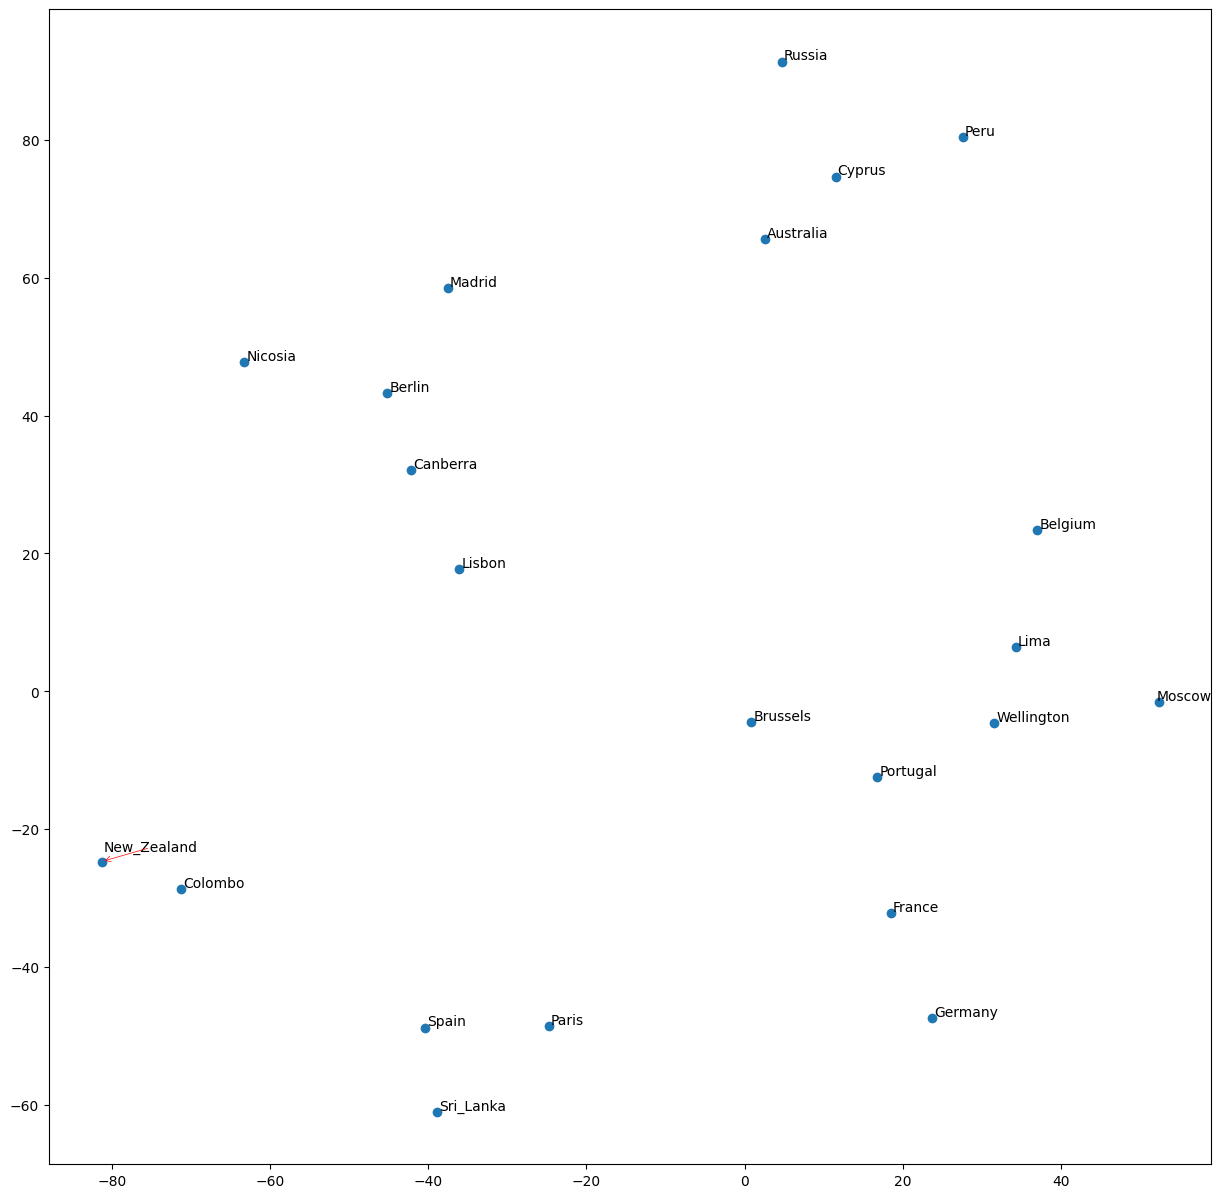

In [ ]:
# used for dimension reduction and visualization
from sklearn.manifold import TSNE   ##for dimensionality reduction.
%matplotlib inline
import matplotlib.pyplot as plt    ## for plotting.
from adjustText import adjust_text   ##adjusting text annotations in plots.

walk_tsne = TSNE(random_state=42, perplexity=3)   ## fixed random seed=42
X_tsne = walk_tsne.fit_transform(X_embeddings)    ## transforms them into a lower-dimensional space(2D)

plt.figure(figsize=(15, 15))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])

texts = []   ## Initializes an empty list to store text objects.
for x, y, lab in zip(X_tsne[:, 0], X_tsne[:, 1], entities):
    lab = lab.split('/')[-1]    ## Extracts the last part of the URI to use as the label.
    text = plt.text(x, y, lab)
    texts.append(text)

adjust_text(texts, lim=5, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))
plt.show()

##When many points are close to each other, text annotations can overlap, making the plot hard to read. By moving the text labels and using arrows, you can ensure that all labels are readable.